In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from ast import literal_eval
import sklearn as sk
import seaborn as sb
import re 
from tqdm import tqdm

In [39]:
def initialize_data():
    data = pd.read_csv("data/df_text_spacy.csv")
    data2 = pd.read_csv("data/train_500.csv")
    data2 = data2[["gender", "age", "topic", "sign"]]
    data = data.join(data2)
    data = data.drop(["Unnamed: 0"], axis=1)

    data['sent_tokenize'] = data.apply(lambda row: sent_tokenize(row['text']), axis=1)
    data['word_tokenize'] = data.apply(lambda row: word_tokenize(row['text']), axis=1)
    data['sentence_count'] = data.apply(lambda row: len(row['sent_tokenize']), axis=1)
    data['word_count'] = data.apply(lambda row: len(row['text_list']), axis=1)

    return data

In [40]:
data = initialize_data()

In [41]:
data["gender"].value_counts()

male      11002
female     8498
Name: gender, dtype: int64

In [72]:
data_male = data[data["gender"] == "male"]
data_male.reset_index(inplace=True)
#data_male.drop("Unnamed: 0", axis=1, inplace=True)

data_female = data[data["gender"] == "female"]
data_female.reset_index(inplace=True)
#data_female.drop("Unnamed: 0", axis=1, inplace=True)



In [43]:
data_male.describe()

,lemma_list_num_of_stopwords,age,sentence_count,word_count
count,11002.000000,11002.000000,11002.000000,11002.000000
mean,60.428104,26.626795,8.025904,1310.274859
std,59.201220,7.814512,7.483871,1233.525402
min,0.000000,13.000000,1.000000,18.000000
25%,14.000000,23.000000,2.000000,341.000000
50%,41.000000,25.000000,5.000000,921.500000
75%,89.000000,33.000000,12.000000,1899.750000
max,312.000000,48.000000,33.000000,6161.000000


In [44]:
data_female.describe()

,lemma_list_num_of_stopwords,age,sentence_count,word_count
count,8498.000000,8498.000000,8498.000000,8498.000000
mean,67.045775,26.308426,8.894681,1436.912568
std,59.608547,7.289428,7.894702,1220.157673
min,0.000000,13.000000,1.000000,19.000000
25%,18.000000,23.000000,2.000000,434.000000
50%,50.000000,25.000000,6.000000,1117.000000
75%,101.000000,27.000000,13.000000,2135.000000
max,319.000000,48.000000,33.000000,5950.000000


<AxesSubplot:xlabel='word_count', ylabel='Count'>

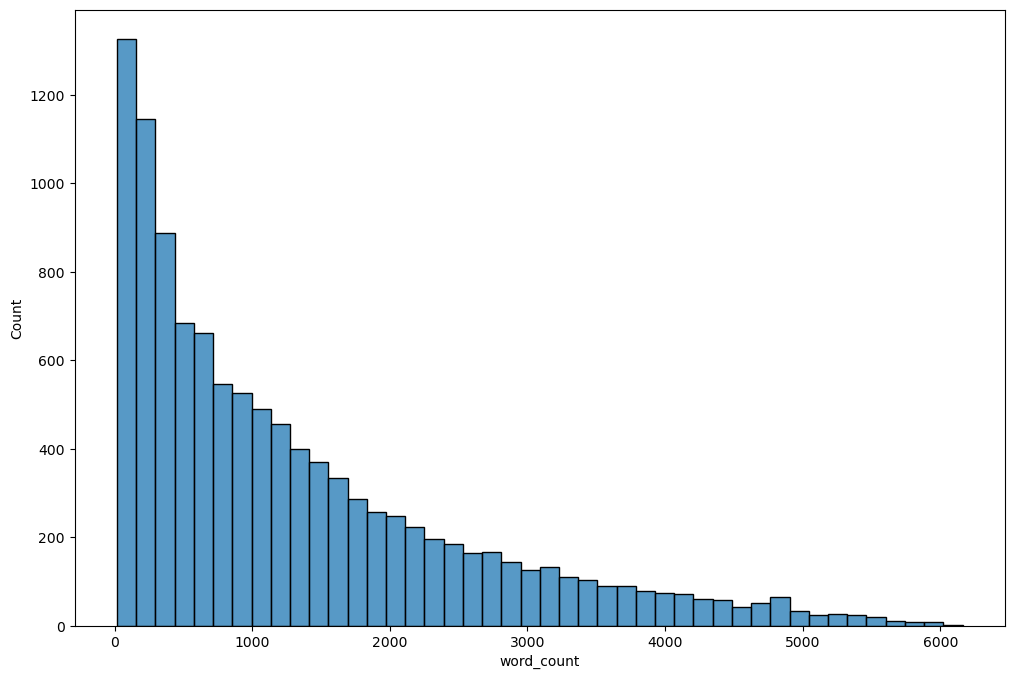

In [46]:
plt.figure(figsize=(12,8))
sb.histplot(x="word_count", data=data_male)

<AxesSubplot:xlabel='word_count', ylabel='Count'>

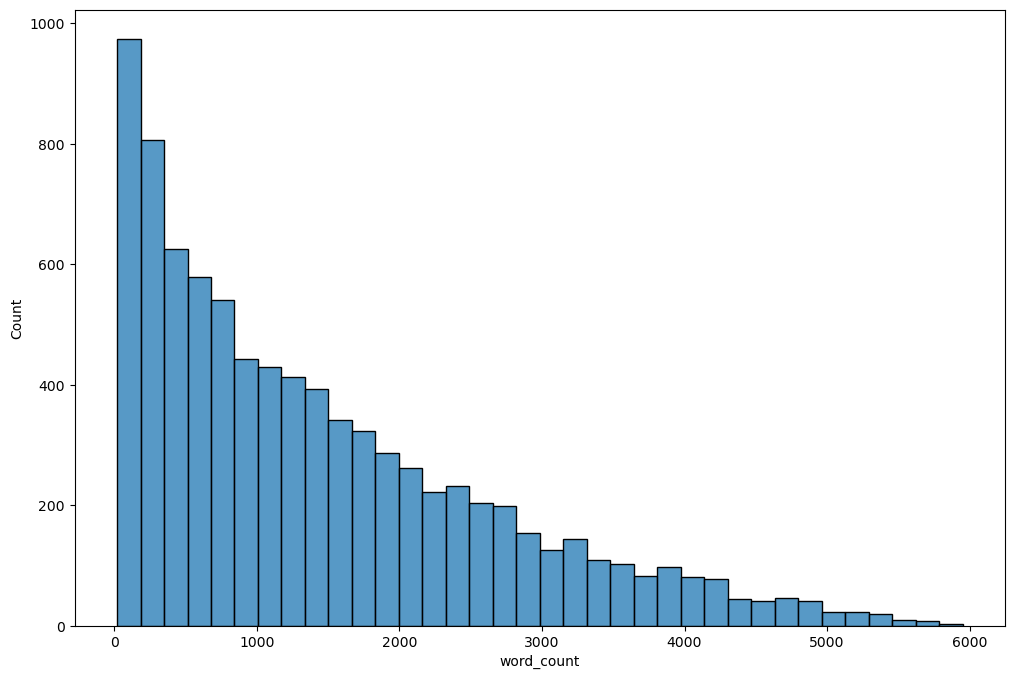

In [47]:
plt.figure(figsize=(12,8))
sb.histplot(x="word_count", data=data_female)

<AxesSubplot:xlabel='count_word', ylabel='Count'>

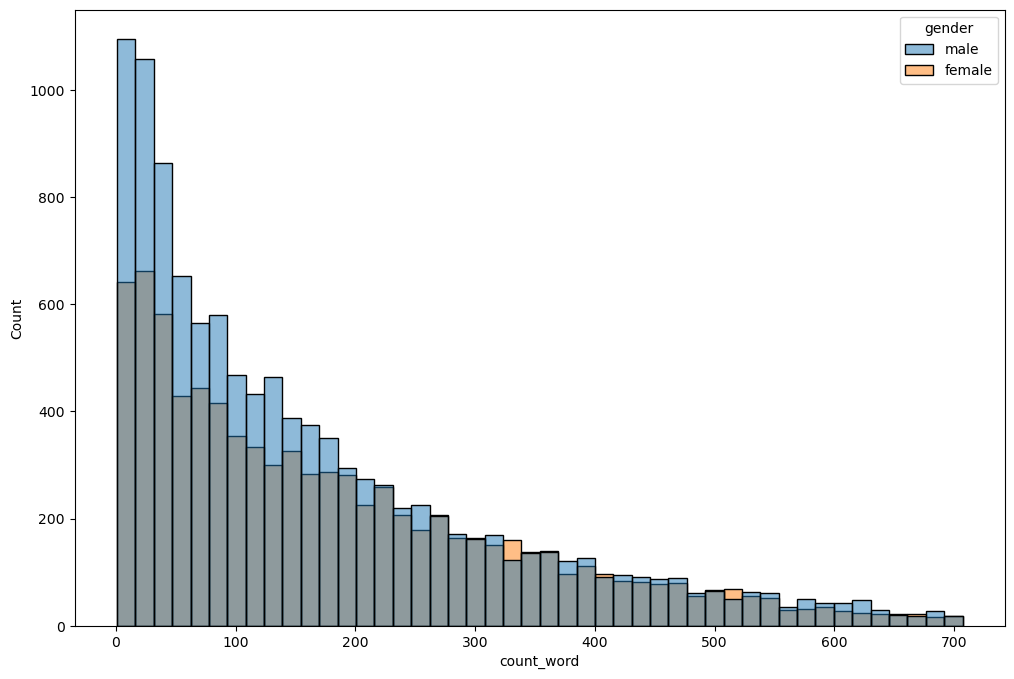

In [14]:
plt.figure(figsize=(12,8))
sb.histplot(x="count_word", data=data, hue="gender")

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

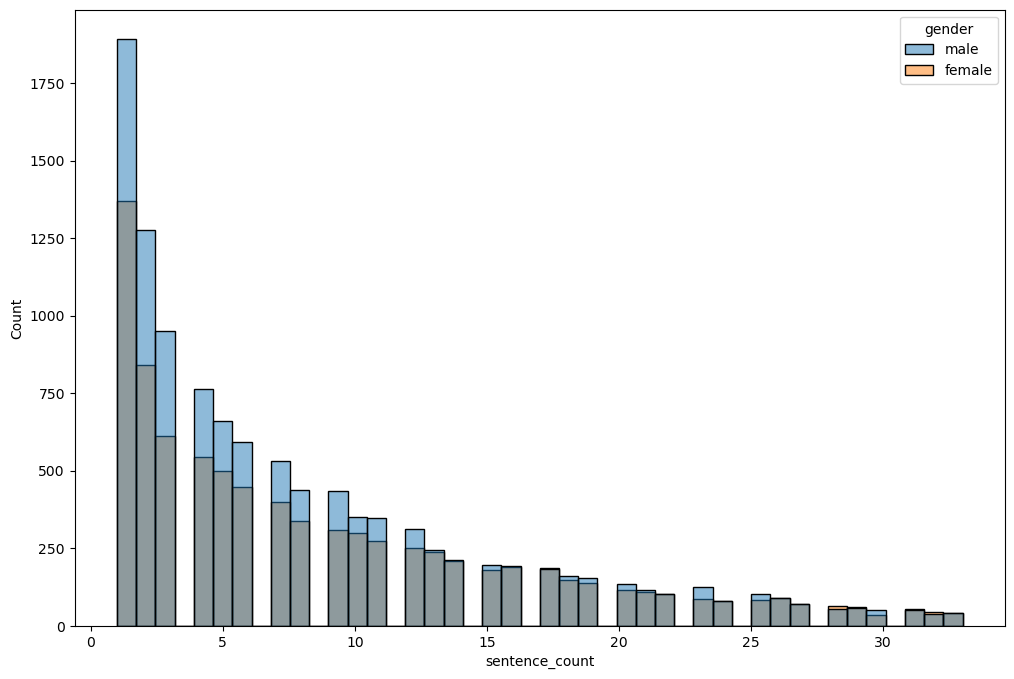

In [48]:
plt.figure(figsize=(12,8))
sb.histplot(x="sentence_count", data=data, hue="gender")

In [51]:
data.head(2)

,text,text_list,lemma_list,pos_list,tag_list,dep_list,shape_list,alpha_list,stop_list,lemma_list_num_of_stopwords,...,data_lemmatized_noun,text_out_list_noun,gender,age,topic,sign,sent_tokenize,word_tokenize,sentence_count,word_count
0,This blog is being posted due to the fact that...,"['This', 'blog', 'is', 'being', 'posted', 'due...","['this', 'blog', 'be', 'be', 'post', 'due', 't...","['DET', 'NOUN', 'AUX', 'AUX', 'VERB', 'ADP', '...","['DT', 'NN', 'VBZ', 'VBG', 'VBN', 'IN', 'IN', ...","['det', 'nsubjpass', 'aux', 'auxpass', 'ROOT',...","['Xxxx', 'xxxx', 'xx', 'xxxx', 'xxxx', 'xxx', ...","[True, True, True, True, True, True, True, Tru...","[True, False, True, True, False, True, True, T...",34,...,fact development regard day school uniform swa...,"['fact', 'development', 'regard', 'day', 'scho...",male,14,Student,Sagittarius,[This blog is being posted due to the fact tha...,"[This, blog, is, being, posted, due, to, the, ...",4,729
1,So I have a big fucking interview tomorrow for...,"['So', 'I', 'have', 'a', 'big', 'fucking', 'in...","['so', '-PRON-', 'have', 'a', 'big', 'fucking'...","['CCONJ', 'PRON', 'AUX', 'DET', 'ADJ', 'ADJ', ...","['CC', 'PRP', 'VBP', 'DT', 'JJ', 'JJ', 'NN', '...","['advmod', 'nsubj', 'ROOT', 'det', 'amod', 'am...","['Xx', 'X', 'xxxx', 'x', 'xxx', 'xxxx', 'xxxx'...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, False, False, False, ...",32,...,interview tomorrow school talk people girl spo...,"['interview', 'tomorrow', 'school', 'talk', 'p...",male,15,Student,Pisces,[So I have a big fucking interview tomorrow fo...,"[So, I, have, a, big, fucking, interview, tomo...",5,684


In [82]:
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(data["lemma_list"][i]):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I", "-PRON-", "-", "'", "'s", "urllink"] and word not in stopword_list:
                    if word in word_dict_without_stopwords.keys():
                        word_dict_without_stopwords[word] += 1
                    else:
                        word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(data["word_tokenize"][i]):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I", "-PRON-", "-", "'"]:
                    if word in word_dict_with_stopwords.keys():
                        word_dict_with_stopwords[word] += 1
                    else:
                        word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [83]:
words_without_stopwords_all = create_word_dict(data, True, False)
words_without_stopwords_male = create_word_dict(data_male, True, False)
words_without_stopwords_female = create_word_dict(data_female, True, False)

100%|██████████| 8498/8498 [00:03<00:00, 2580.73it/s]


In [78]:
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig(str(save_name + ".jpg"))

    return fig.get_figure()

UnboundLocalError: local variable 'fig' referenced before assignment

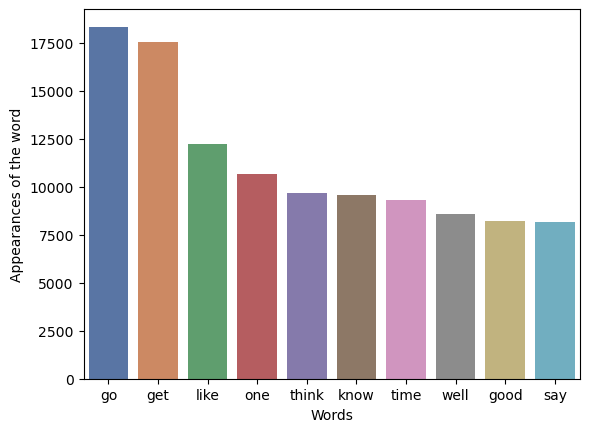

In [84]:
figure_1 = visualize_specific_words(words_without_stopwords_all, save_fig=False)

UnboundLocalError: local variable 'fig' referenced before assignment

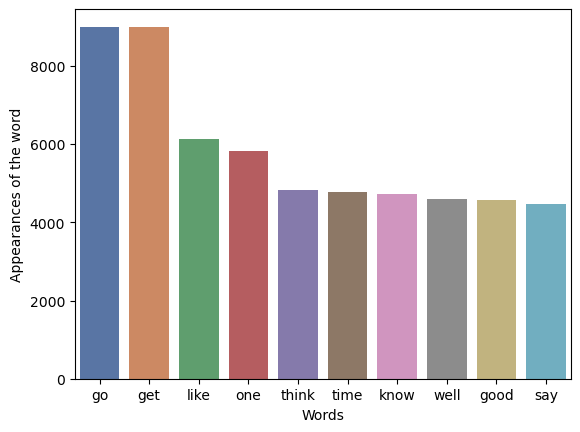

In [85]:
figure_2 = visualize_specific_words(words_without_stopwords_male, save_fig=False)

UnboundLocalError: local variable 'fig' referenced before assignment

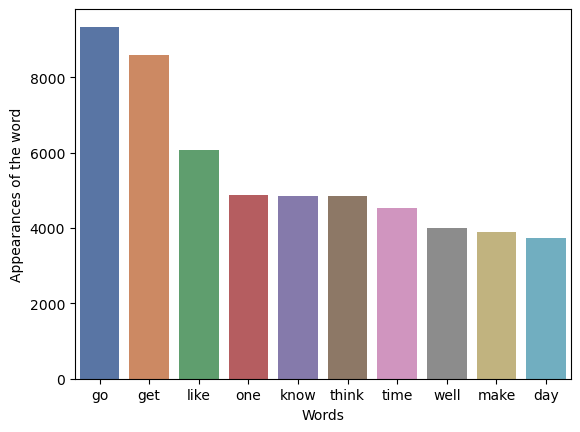

In [86]:
figure_3 = visualize_specific_words(words_without_stopwords_female, save_fig=False)